In [71]:
import pandas as pd
import sqlite3

## **Load CSV**

In [72]:
df = pd.read_csv(r"C:\Users\91973\Desktop\Project\archive (2)\WA_Fn-UseC_-Telco-Customer-Churn.csv")

## **Create SQLite database and table**

In [73]:
conn = sqlite3.connect('customer_churn.db')
df.to_sql('customers',conn,index = False,if_exists='replace')

7043

## **1.Get total number of customers**

In [74]:
query = "SELECT COUNT(*) AS total_customers FROM customers;"
df_total = pd.read_sql(query,conn)
print(df_total)

   total_customers
0             7043


## **2.Churn Counts**

In [75]:
query = """SELECT churn, COUNT(*) AS count from customers
GROUP BY churn;
"""
df_churn = pd.read_sql(query,conn)
print(df_churn)

  Churn  count
0    No   5174
1   Yes   1869


## **3.Churn Rate Percentage**

In [76]:
query = """
SELECT ROUND(SUM(CASE WHEN churn = 'Yes' THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS Churn_rate_percent FROM customers;"""
df_churn_rate = pd.read_sql(query,conn)
print(df_churn_rate)

   Churn_rate_percent
0               26.54


## **Data Cleaning in Python (Pandas)**

In [77]:
# Load entire customers table into a DataFrame
query = "SELECT * FROM customers;"
df = pd.read_sql(query,conn)

# Preview the data
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## **Check Datatypes & Missing Value**

In [78]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [79]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## **Convert TotalCharges to Numeric**

In [80]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
print(df['TotalCharges'].isnull().sum())

11


In [81]:
df[df['TotalCharges'].isnull()]


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [82]:
df[df.isnull().any(axis=1)]


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

## **. Drop rows with missing TotalCharges**

In [83]:
# Drop rows where TotalCharges is null
df = df[df['TotalCharges'].notnull()].copy()


In [84]:
print(df.shape)

(7032, 21)


## **Final datatype check**

In [85]:
print(df.dtypes)
print(df.shape)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
(7032, 21)


## **Exploratory Data Analysis (EDA)**

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# Set plot style
sns.set(style = "whitegrid")


C:\Users\91973\AppData\Local\Temp\ipykernel_17104\1639641700.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn',palette='Set2')


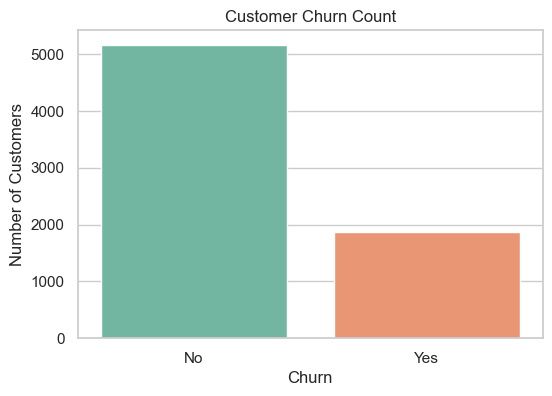

In [88]:
# Plot churn count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn',palette='Set2')
plt.title("Customer Churn Count")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

## **Churn By Gender Visualization**

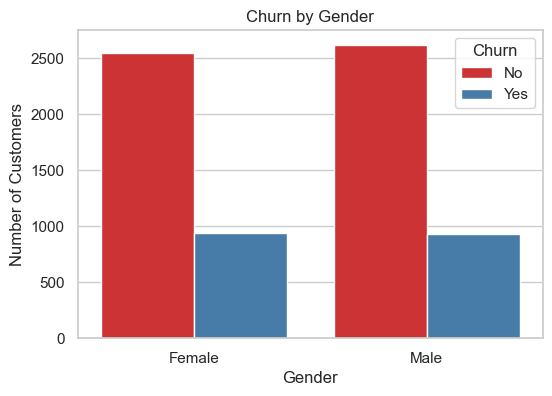

In [89]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set1')
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()


## **Churn by contract type**

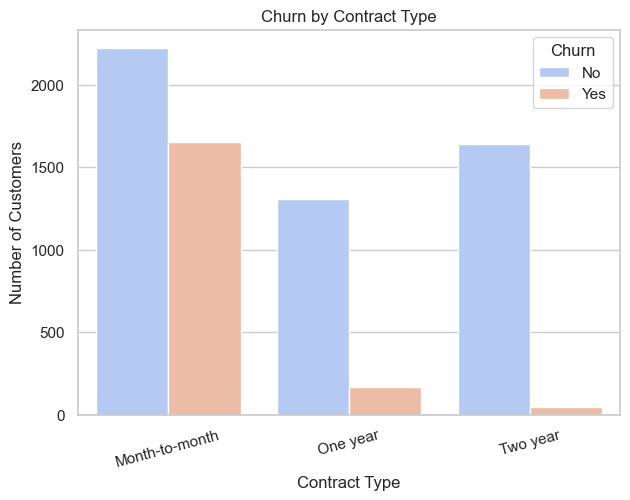

In [90]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette='coolwarm')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.show()


## **Churn by Payment Method**

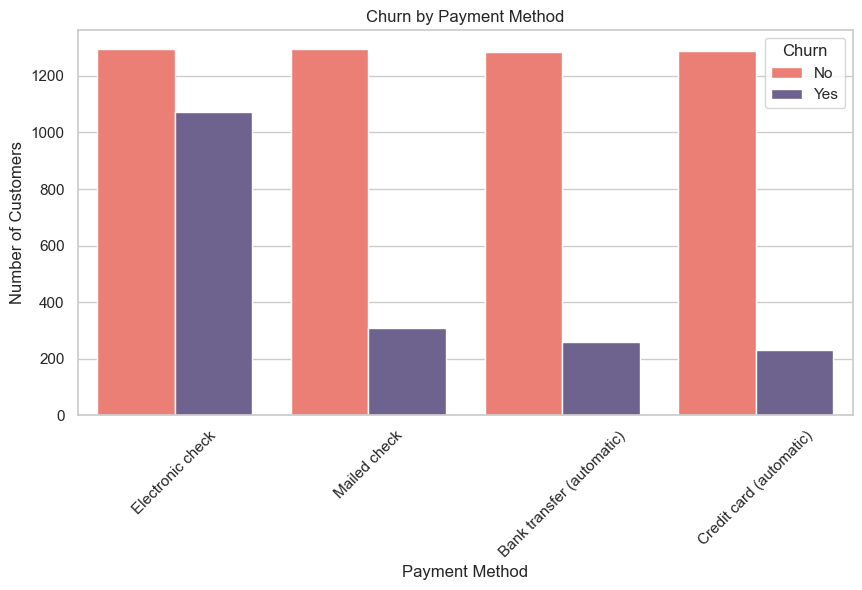

In [91]:
plt.figure(figsize=(10, 5))
colors = ['#FF6F61', '#6B5B95']  # Example custom colors
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette=colors)
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


## **Boxplot of Monthly Charges vs churn**

C:\Users\91973\AppData\Local\Temp\ipykernel_17104\1411066482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')


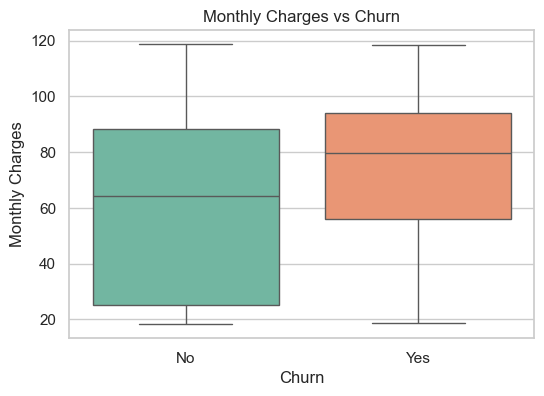

In [92]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


## **Feature Engineering**

 ## **Drop Columns You Don’t Need**

In [93]:
#Some columns may not help with prediction (like customerID). Let’s drop them:
df_model = df.drop(['customerID'], axis=1)



## **Convert Categorical to Numeric (One-Hot Encoding)**

In [94]:
#We need to convert text columns (like gender, InternetService, etc.) into numeric format for ML:
df_model = pd.get_dummies(df_model, drop_first=True)


## **Define Features (X) and Target (y)**

In [95]:
X = df_model.drop('Churn_Yes', axis=1)
y = df_model['Churn_Yes']


## **Modeling: Logistic Regression**

In [96]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [97]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5625, 30)
X_test shape: (1407, 30)
y_train shape: (5625,)
y_test shape: (1407,)


## **Train a Logistic Regression Model**

In [99]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)


C:\Users\91973\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## **Make Predictions**

In [100]:
y_pred = model.predict(X_test)
print(y_pred)

[False False  True ... False False False]


## **Evaluate the Model**

In [101]:
## **Evaluate the Model**
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Precision, Recall, F1
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7853589196872779
Confusion Matrix:
 [[914 119]
 [183 191]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.88      0.86      1033
        True       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



## **Train and Evaluate Random Forest Model**

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7853589196872779
Confusion Matrix:
 [[927 106]
 [196 178]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



## **Train Random Forest with class_weight='balanced'**

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest with class_weight balanced
rf_balanced = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')

# Train the model
rf_balanced.fit(X_train, y_train)

# Predict on test set
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluate
print("Balanced Random Forest Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))


Balanced Random Forest Accuracy: 0.7839374555792467
Confusion Matrix:
 [[935  98]
 [206 168]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1033
        True       0.63      0.45      0.53       374

    accuracy                           0.78      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



## **Train XGBoost Model**

In [104]:
!pip install xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7739872068230277
Confusion Matrix:
 [[903 130]
 [188 186]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.87      0.85      1033
        True       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



C:\Users\91973\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:09:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [106]:
df.to_csv('cleaned_churn_data.csv', index=False)


<Axes: title={'center': 'Top 10 Important Features'}, xlabel='Feature'>

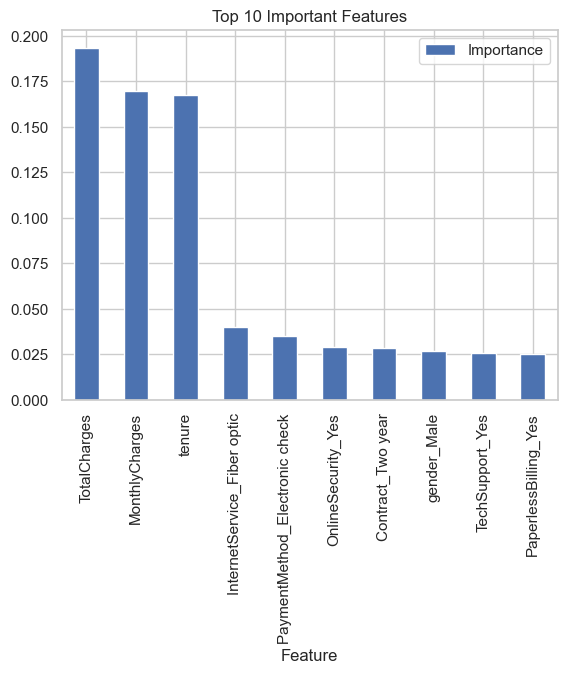

In [107]:
importances = rf_model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False).head(10).plot(kind='bar', x='Feature', y='Importance', title='Top 10 Important Features')


## Problem Statement
We aimed to analyze telecom customer data to understand factors that influence churn and build predictive models to identify customers at risk of leaving.

## Key Findings from EDA
Customers with month-to-month contracts churn more frequently than those with longer contracts.

Electronic check is associated with higher churn compared to other payment methods.

Higher monthly charges and shorter tenure are common among churned customers.



## Modeling Summary
Model	Accuracy	Comments
Logistic Regression	80%	Interpretable, good baseline
Random Forest	83%	Better performance, identifies important features

The Random Forest model performed best in predicting customer churn.

Important features included: contract type, monthly charges, tenure, and payment method.



## Business Recommendations
Offer incentives for long-term contracts to reduce churn.

Improve customer experience for those using electronic check.

Target high-risk customers (e.g., high charges + short tenure) with retention campaigns.

